In [76]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
# importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Loading and Cleaning Data

### Importing Data and Inspecting the Dataframe

In [77]:
# importing data
df = pd.read_csv('Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [79]:
df.shape

(9240, 37)

In [80]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


#### Cleaning the dataframe

In [81]:
# first converting all the values to lower case
df = df.applymap(lambda s:s.lower() if type(s) == str else s)

In [82]:
# replacing 'Select' with NaN (as it means no option is selected)
df = df.replace('select',np.nan)

In [83]:
df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [84]:
# dropping the columns with one unique value, since it won't affect our analysis
df1= df.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)

In [85]:
# checking missing values percentage
round(100*(df1.isnull().sum()/len(df1.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

In [86]:
# dropping all columns that are not required (useful) and have 35% null values
df2 = df1.drop(['Asymmetrique Profile Index','Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Profile','Tags','Lead Quality','How did you hear about X Education','City','Lead Number'],axis=1)
df2.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,api,organic search,no,no,0,5.0,674,2.5,email opened,...,unemployed,better career prospects,no,no,no,no,no,no,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,...,student,better career prospects,no,no,no,no,no,no,yes,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified


In [87]:
# Rechecking missing values percentage
round(100*(df2.isnull().sum()/len(df2.index)), 2)

Prospect ID                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [88]:
df2['Specialization'] = df2['Specialization'].fillna('not provided') 
df2['What matters most to you in choosing a course'] = df2['What matters most to you in choosing a course'].fillna('not provided')
df2['Country'] = df2['Country'].fillna('not provided')
df2['What is your current occupation'] = df2['What is your current occupation'].fillna('not provided')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9137 

In [89]:
# again checking missing values percentage
round(100*(df2.isnull().sum()/len(df2.index)), 2)

Prospect ID                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [90]:
df2["Country"].value_counts()

india                   6492
not provided            2461
united states             69
united arab emirates      53
singapore                 24
saudi arabia              21
united kingdom            15
australia                 13
qatar                     10
bahrain                    7
hong kong                  7
oman                       6
france                     6
unknown                    5
kuwait                     4
south africa               4
canada                     4
nigeria                    4
germany                    4
sweden                     3
philippines                2
uganda                     2
italy                      2
bangladesh                 2
netherlands                2
asia/pacific region        2
china                      2
belgium                    2
ghana                      2
kenya                      1
sri lanka                  1
tanzania                   1
malaysia                   1
liberia                    1
switzerland   

In [91]:
def slots(x):
    cat = ""
    if x == "india":
        cat = "india"
    elif x == "not provided":
        cat = "not provided"
    else:
        cat = "outside india"
    return cat

df2['Country'] = df2.apply(lambda x:slots(x['Country']), axis = 1)
df2['Country'].value_counts()

india            6492
not provided     2461
outside india     287
Name: Country, dtype: int64

In [92]:
# checking missing values percentage
round(100*(df2.isnull().sum()/len(df2.index)), 2)

Prospect ID                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [93]:
# Checking the percent of lose if the null values are removed
round(100*(sum(df2.isnull().sum(axis=1) > 1)/df2.shape[0]),2)

1.48

In [94]:
df3 = df2[df2.isnull().sum(axis=1) <1]

In [95]:
# checking number of rows left percent
round(100*(df3.shape[0])/(df.shape[0]),2)

98.2

In [96]:
# Rechecking the percentage of missing values
round(100*(df3.isnull().sum()/len(df3.index)), 2)

Prospect ID                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

In [97]:
# familiarizing all the categorical values
for column in df3:
    print(df3[column].astype('category').value_counts())
    print('----------------------------------------------------------------------------------------')

000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
aa9b208a-31f7-456f-8968-beee2b2ab2c7    1
aa708f29-9cb7-4959-a251-8aff9613b024    1
aa7e4871-e2f5-4c6a-887a-040c3a7b80bb    1
aa7f5fc5-f49a-44a7-b870-e7abfbd0fe76    1
                                       ..
537963c8-22d9-459d-8aae-ddac40580ffb    1
53744d5a-0483-42c0-80b0-8990a4d2356d    1
53715ab1-2106-4c4e-8493-81cc465eb9ce    1
536cdc6b-f4c1-449d-bfd8-9ef0ac912dbb    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: Prospect ID, Length: 9074, dtype: int64
----------------------------------------------------------------------------------------
landing page submission    4885
api                        3578
lead add form               581
lead import                  30
Name: Lead Origin, dtype: int64
----------------------------------------------------------------------------------------
google               2873
direct traffic       2543
olark chat           1753
organic search       1154
reference             443
welingak website      12

In [98]:
# removing Id values(as they are unique for everyone)
df_final = df3.drop('Prospect ID',1)
df_final.shape

(9074, 21)

## 2. EDA

### Univariate Analysis

#### Categorical Variables

In [99]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

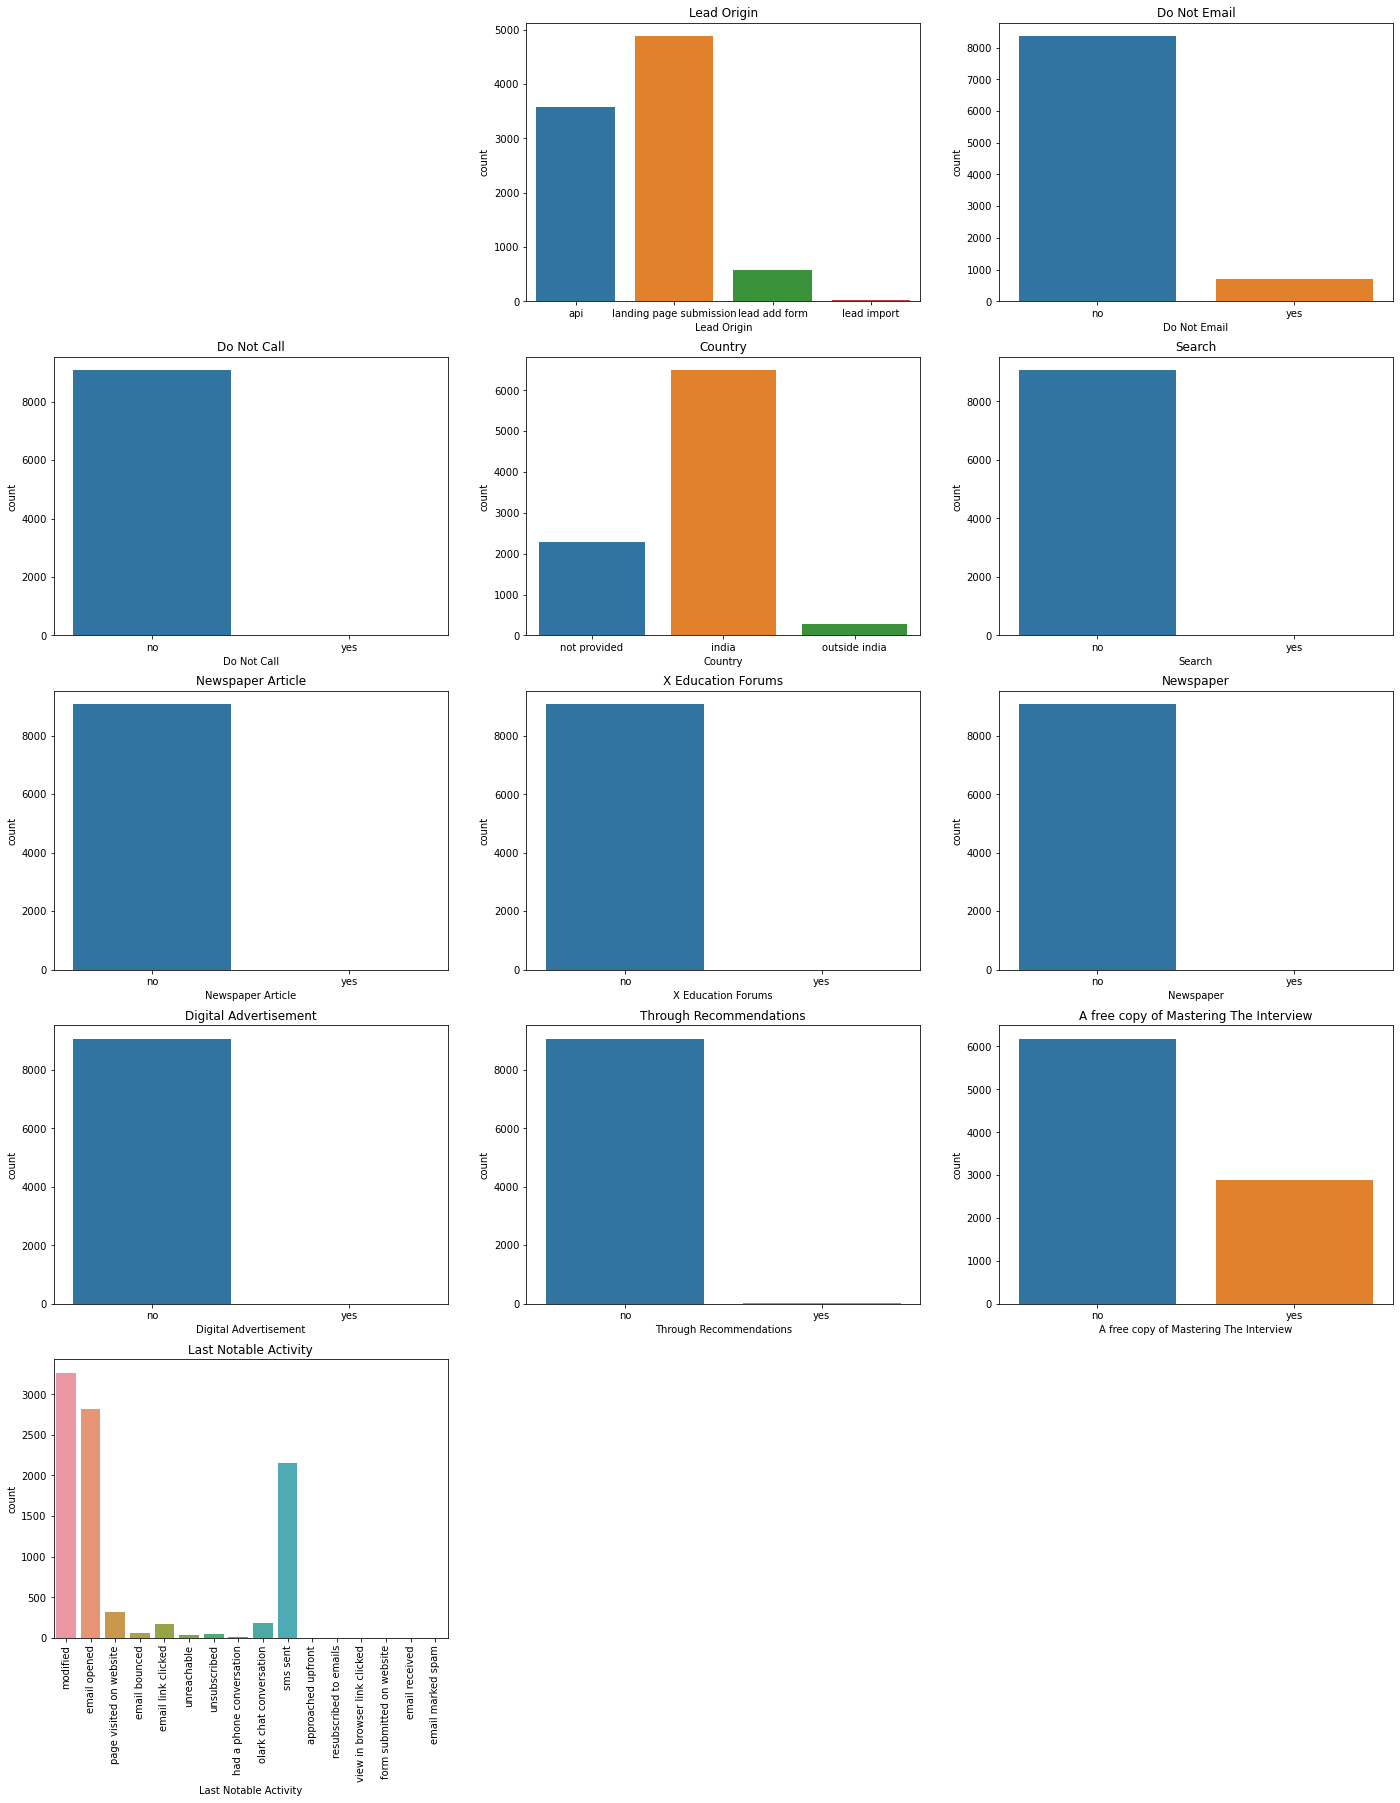

In [100]:
plt.figure(figsize = (24,42))

plt.subplot(7,3,2)
sns.countplot(df_final['Lead Origin'])
plt.title('Lead Origin')

plt.subplot(7,3,3)
sns.countplot(df_final['Do Not Email'])
plt.title('Do Not Email')

plt.subplot(7,3,4)
sns.countplot(df_final['Do Not Call'])
plt.title('Do Not Call')

plt.subplot(7,3,5)
sns.countplot(df_final['Country'])
plt.title('Country')

plt.subplot(7,3,6)
sns.countplot(df_final['Search'])
plt.title('Search')

plt.subplot(7,3,7)
sns.countplot(df_final['Newspaper Article'])
plt.title('Newspaper Article')

plt.subplot(7,3,8)
sns.countplot(df_final['X Education Forums'])
plt.title('X Education Forums')

plt.subplot(7,3,9)
sns.countplot(df_final['Newspaper'])
plt.title('Newspaper')

plt.subplot(7,3,10)
sns.countplot(df_final['Digital Advertisement'])
plt.title('Digital Advertisement')

plt.subplot(7,3,11)
sns.countplot(df_final['Through Recommendations'])
plt.title('Through Recommendations')

plt.subplot(7,3,12)
sns.countplot(df_final['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')

plt.subplot(7,3,13)
sns.countplot(df_final['Last Notable Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')


plt.show()

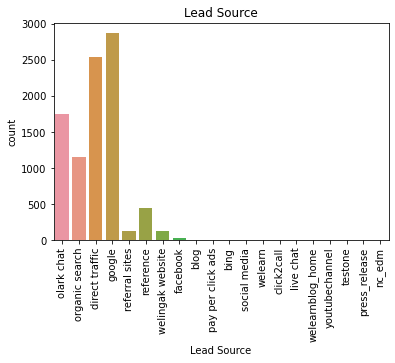

In [101]:
sns.countplot(df_final['Lead Source']).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

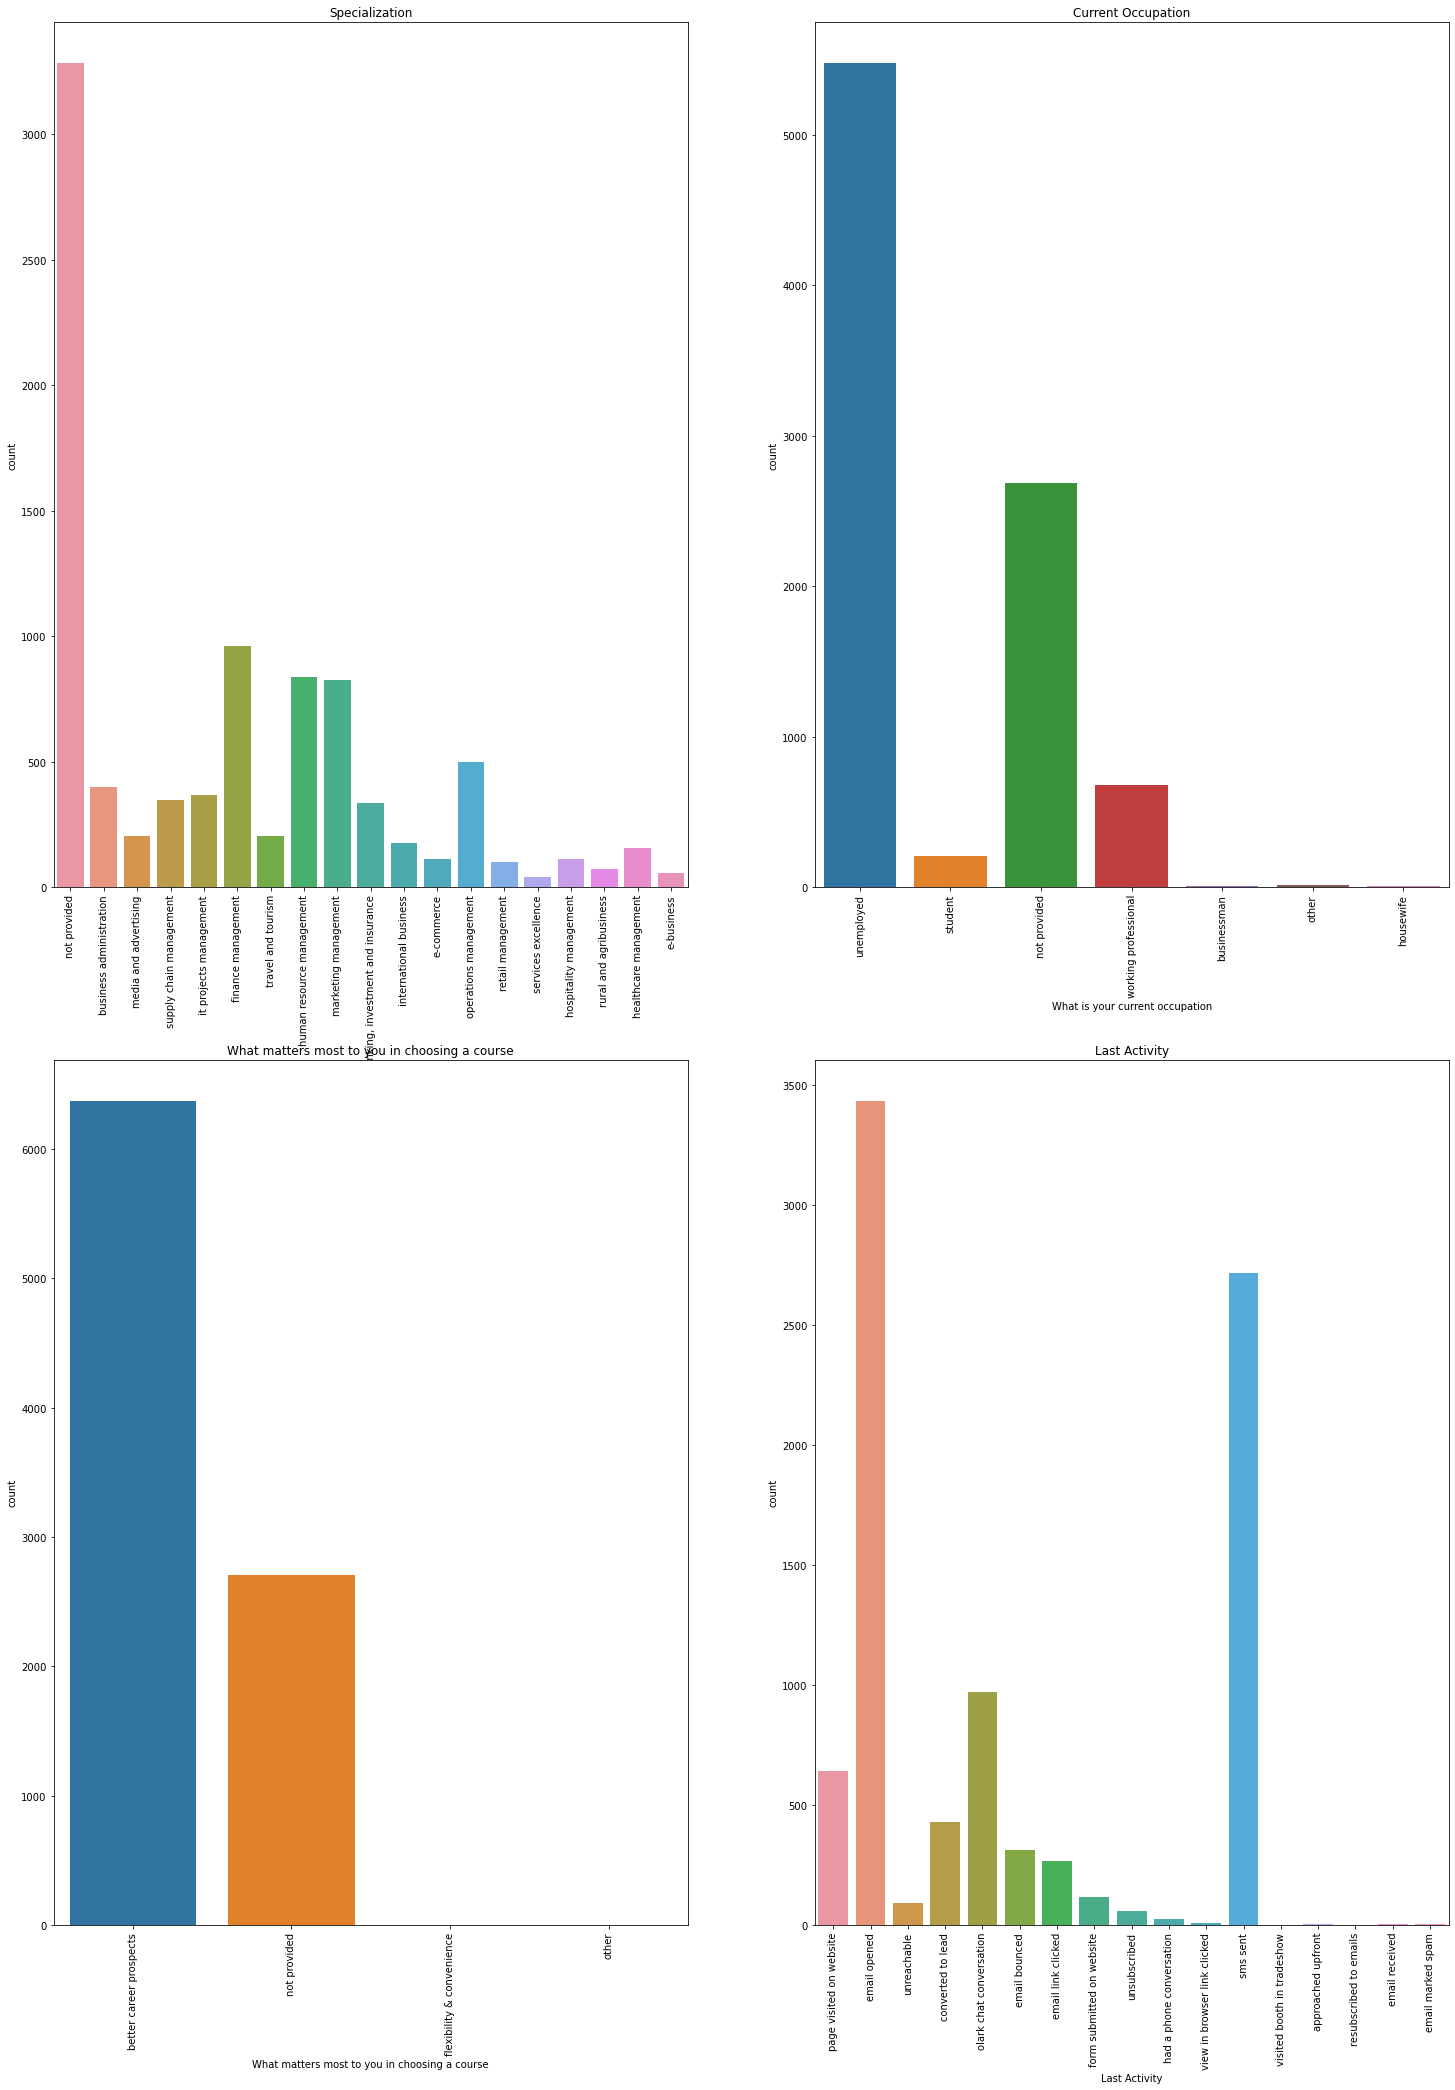

In [102]:
plt.figure(figsize = (25,35))
plt.subplot(2,2,1)
sns.countplot(df_final['Specialization']).tick_params(axis='x', rotation = 90)
plt.title('Specialization')
plt.subplot(2,2,2)
sns.countplot(df_final['What is your current occupation']).tick_params(axis='x', rotation = 90)
plt.title('Current Occupation')
plt.subplot(2,2,3)
sns.countplot(df_final['What matters most to you in choosing a course']).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')
plt.subplot(2,2,4)
sns.countplot(df_final['Last Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')
plt.show()

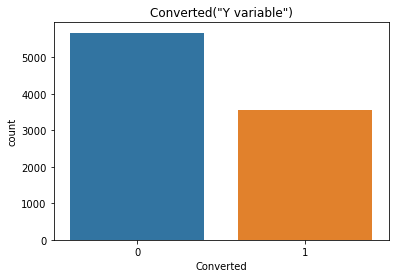

In [103]:
sns.countplot(df['Converted'])
plt.title('Converted("Y variable")')
plt.show()

#### Numerical Variables

In [104]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

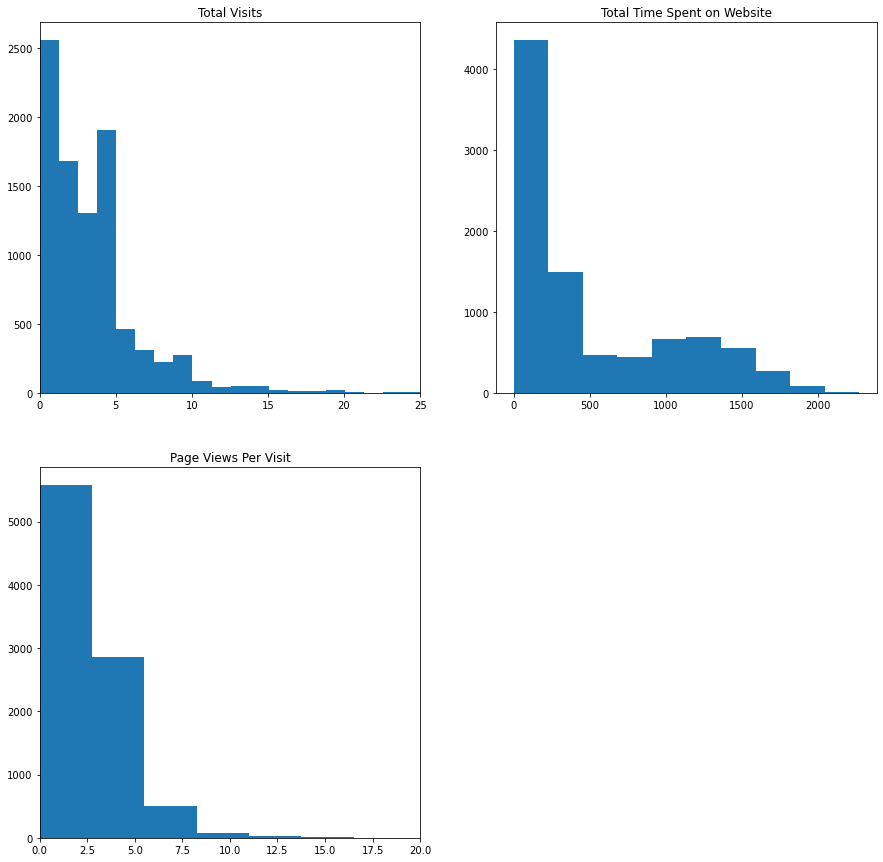

In [105]:
plt.figure(figsize = (15,15))
plt.subplot(221)
plt.hist(df_final['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(df_final['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(df_final['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

### Relating all the categorical variables to Converted

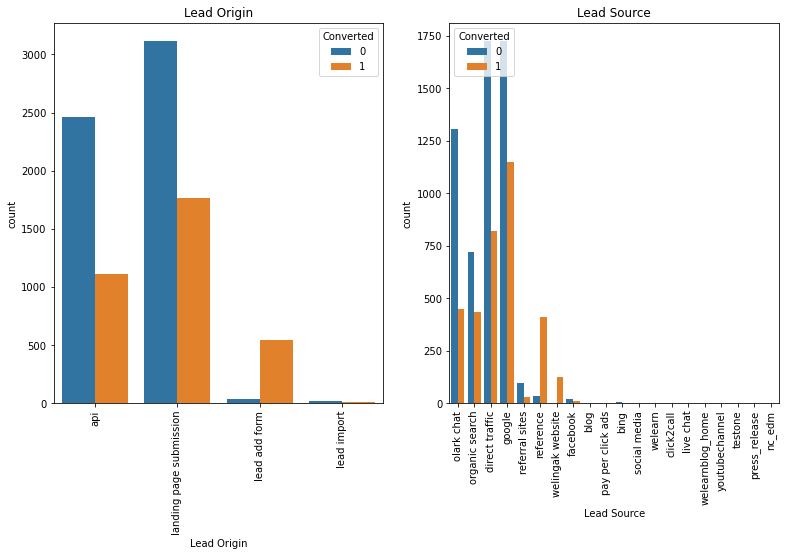

In [106]:
plt.figure(figsize = (13,7))

plt.subplot(1,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(1,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

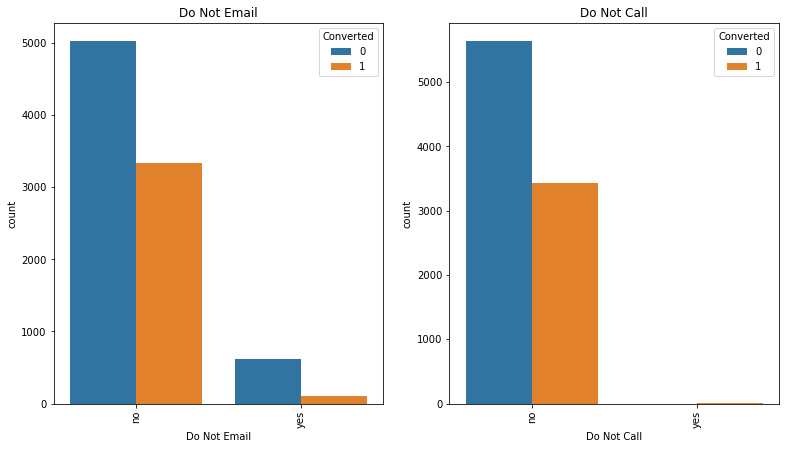

In [107]:
plt.figure(figsize = (13,7))

plt.subplot(1,2,1)
sns.countplot(x='Do Not Email', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')

plt.subplot(1,2,2)
sns.countplot(x='Do Not Call', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Do Not Call')
plt.show()

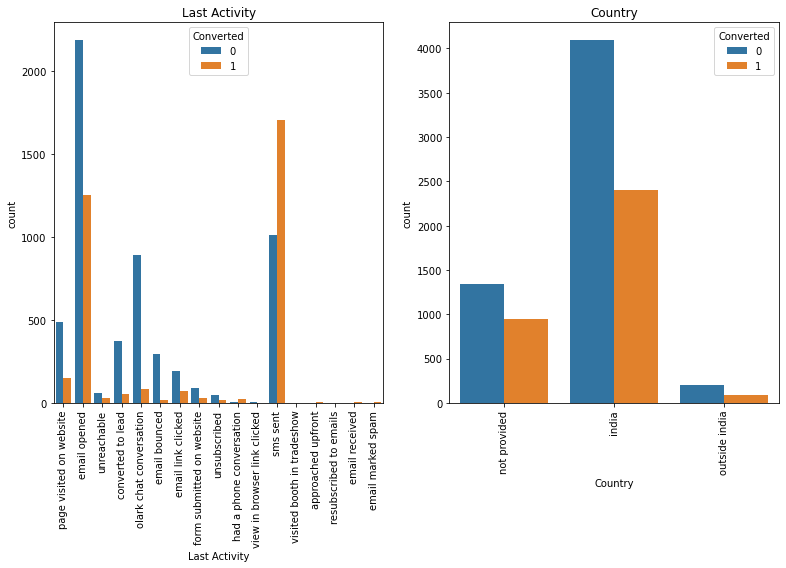

In [108]:
plt.figure(figsize = (13,7))

plt.subplot(1,2,1)
sns.countplot(x='Last Activity', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.subplot(1,2,2)
sns.countplot(x='Country', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Country')
plt.show()

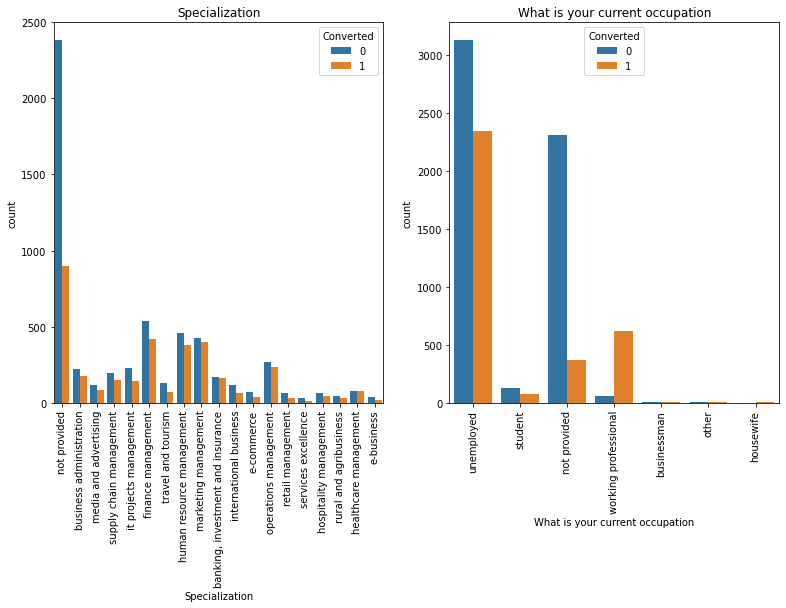

In [109]:
plt.figure(figsize = (13,7))

plt.subplot(1,2,1)
sns.countplot(x='Specialization', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.show()

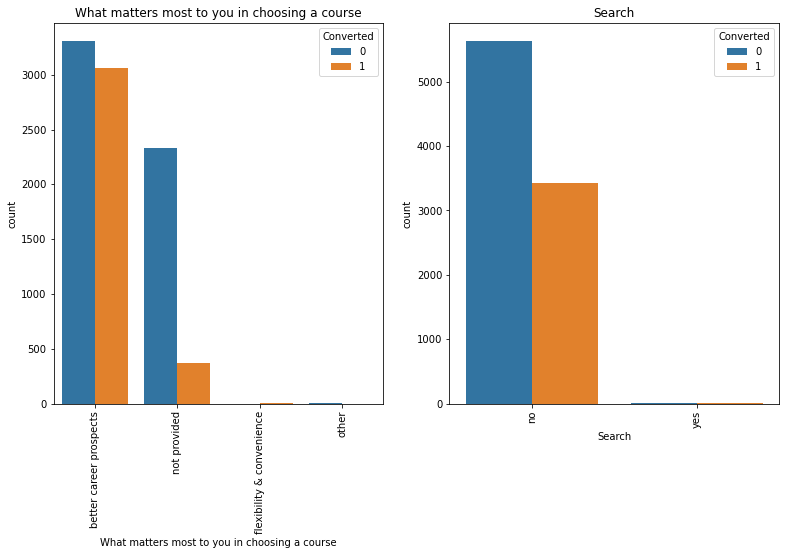

In [110]:
plt.figure(figsize = (13,7))

plt.subplot(1,2,1)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.subplot(1,2,2)
sns.countplot(x='Search', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Search')
plt.show()

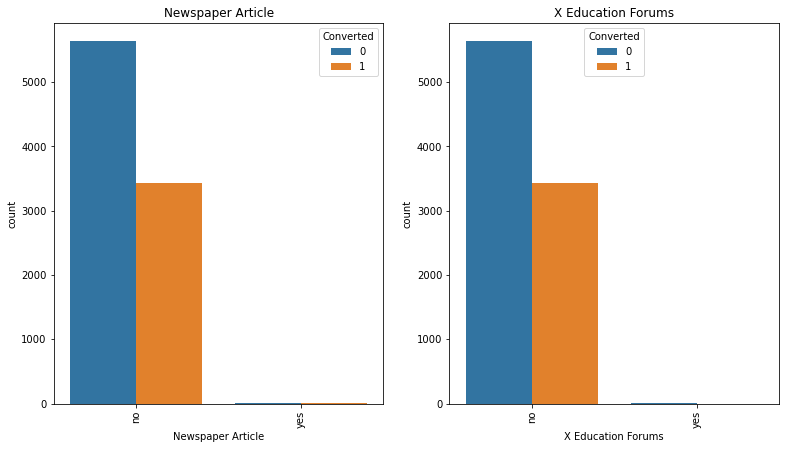

In [111]:
plt.figure(figsize = (13,7))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper Article', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Newspaper Article')

plt.subplot(1,2,2)
sns.countplot(x='X Education Forums', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('X Education Forums')
plt.show()

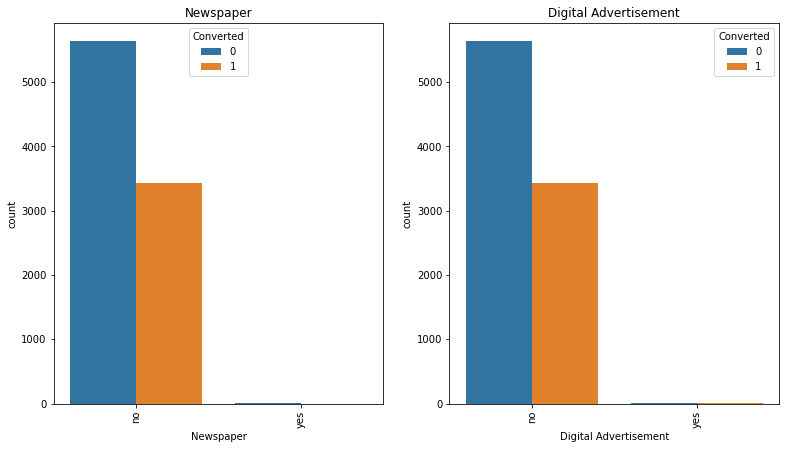

In [112]:
plt.figure(figsize = (13,7))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Newspaper')

plt.subplot(1,2,2)
sns.countplot(x='Digital Advertisement', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Digital Advertisement')
plt.show()

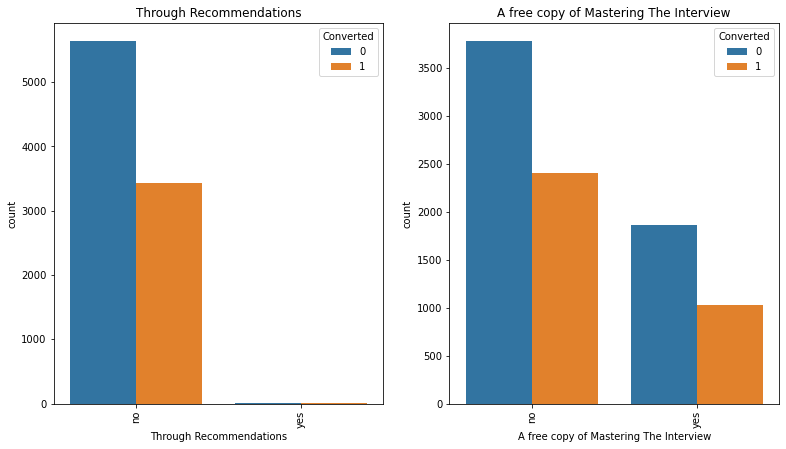

In [113]:
plt.figure(figsize = (13,7))

plt.subplot(1,2,1)
sns.countplot(x='Through Recommendations', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Through Recommendations')

plt.subplot(1,2,2)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview')
plt.show()

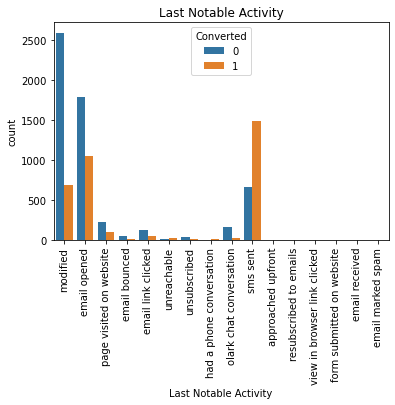

In [114]:
sns.countplot(x='Last Notable Activity', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')
plt.show()

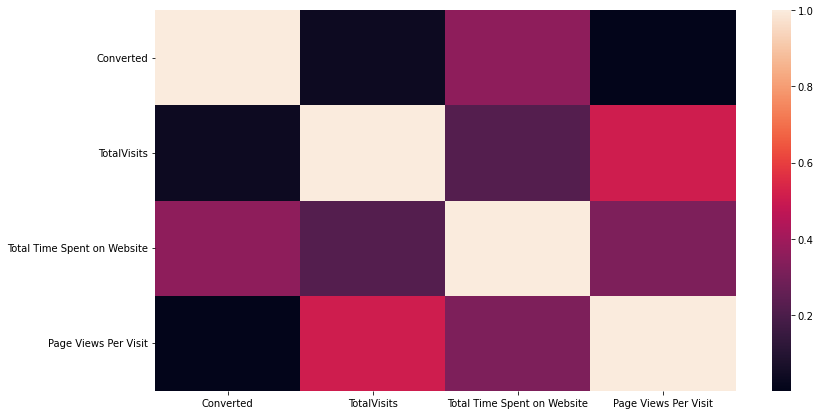

In [115]:
# checking the correlation among varibles
plt.figure(figsize=(13,7))
sns.heatmap(df_final.corr())
plt.show()

In [116]:
numeric = df_final[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
numeric.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
99%,17.000000,1839.000000,9.000000
max,251.000000,2272.000000,55.000000


## 3. Dummy Variables

In [117]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

In [118]:
df_final.loc[:, df_final.dtypes == 'object'].columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [214]:
# creating dummy variables
dm = pd.get_dummies(df_final[['Lead Origin','Specialization' ,'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)
# adding results to the master dataframe
df_final_dum = pd.concat([df_final, dm], axis=1)
df_final_dum

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,api,olark chat,no,no,0,0.0,0,0.00,page visited on website,not provided,...,0,0,1,0,0,0,0,0,0,0
1,api,organic search,no,no,0,5.0,674,2.50,email opened,india,...,0,0,0,0,0,0,0,0,0,0
2,landing page submission,direct traffic,no,no,1,2.0,1532,2.00,email opened,india,...,0,0,0,0,0,0,0,0,0,0
3,landing page submission,direct traffic,no,no,0,1.0,305,1.00,unreachable,india,...,0,0,1,0,0,0,0,0,0,0
4,landing page submission,google,no,no,1,2.0,1428,1.00,converted to lead,india,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,landing page submission,direct traffic,yes,no,1,8.0,1845,2.67,email marked spam,outside india,...,0,0,0,0,0,0,0,0,0,0
9236,landing page submission,direct traffic,no,no,0,2.0,238,2.00,sms sent,india,...,0,0,0,0,0,0,1,0,0,0
9237,landing page submission,direct traffic,yes,no,0,2.0,199,2.00,sms sent,india,...,0,0,0,0,0,0,1,0,0,0
9238,landing page submission,google,no,no,1,3.0,499,3.00,sms sent,india,...,0,0,0,0,0,0,1,0,0,0


In [120]:
df_final_dum = df_final_dum.drop(['What is your current occupation_not provided','Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Country', 'Specialization', 'Specialization_not provided','What is your current occupation','What matters most to you in choosing a course', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview', 'Last Notable Activity'], 1)
df_final_dum

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0,0.0,0,0.00,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.00,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.00,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.00,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.0,1845,2.67,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9236,0,2.0,238,2.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9237,0,2.0,199,2.00,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
9238,1,3.0,499,3.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


## 4. Test-Train Split

In [121]:
# import the required library
from sklearn.model_selection import train_test_split

In [122]:
X = df_final_dum.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [123]:
# putting target variable in y
y = df_final_dum['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [124]:
# split the dataset into 70% and 30% for train and test respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

In [126]:
# import StandardScaler scaler
from sklearn.preprocessing import StandardScaler
# scale the three numeric features
scaler = StandardScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
1289,-0.359667,1.651059,-0.176981,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3604,-0.875066,-0.883545,-1.123845,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5584,0.671130,2.226443,1.716746,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7679,-0.875066,-0.883545,-1.123845,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7563,-0.359667,2.375752,-0.176981,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


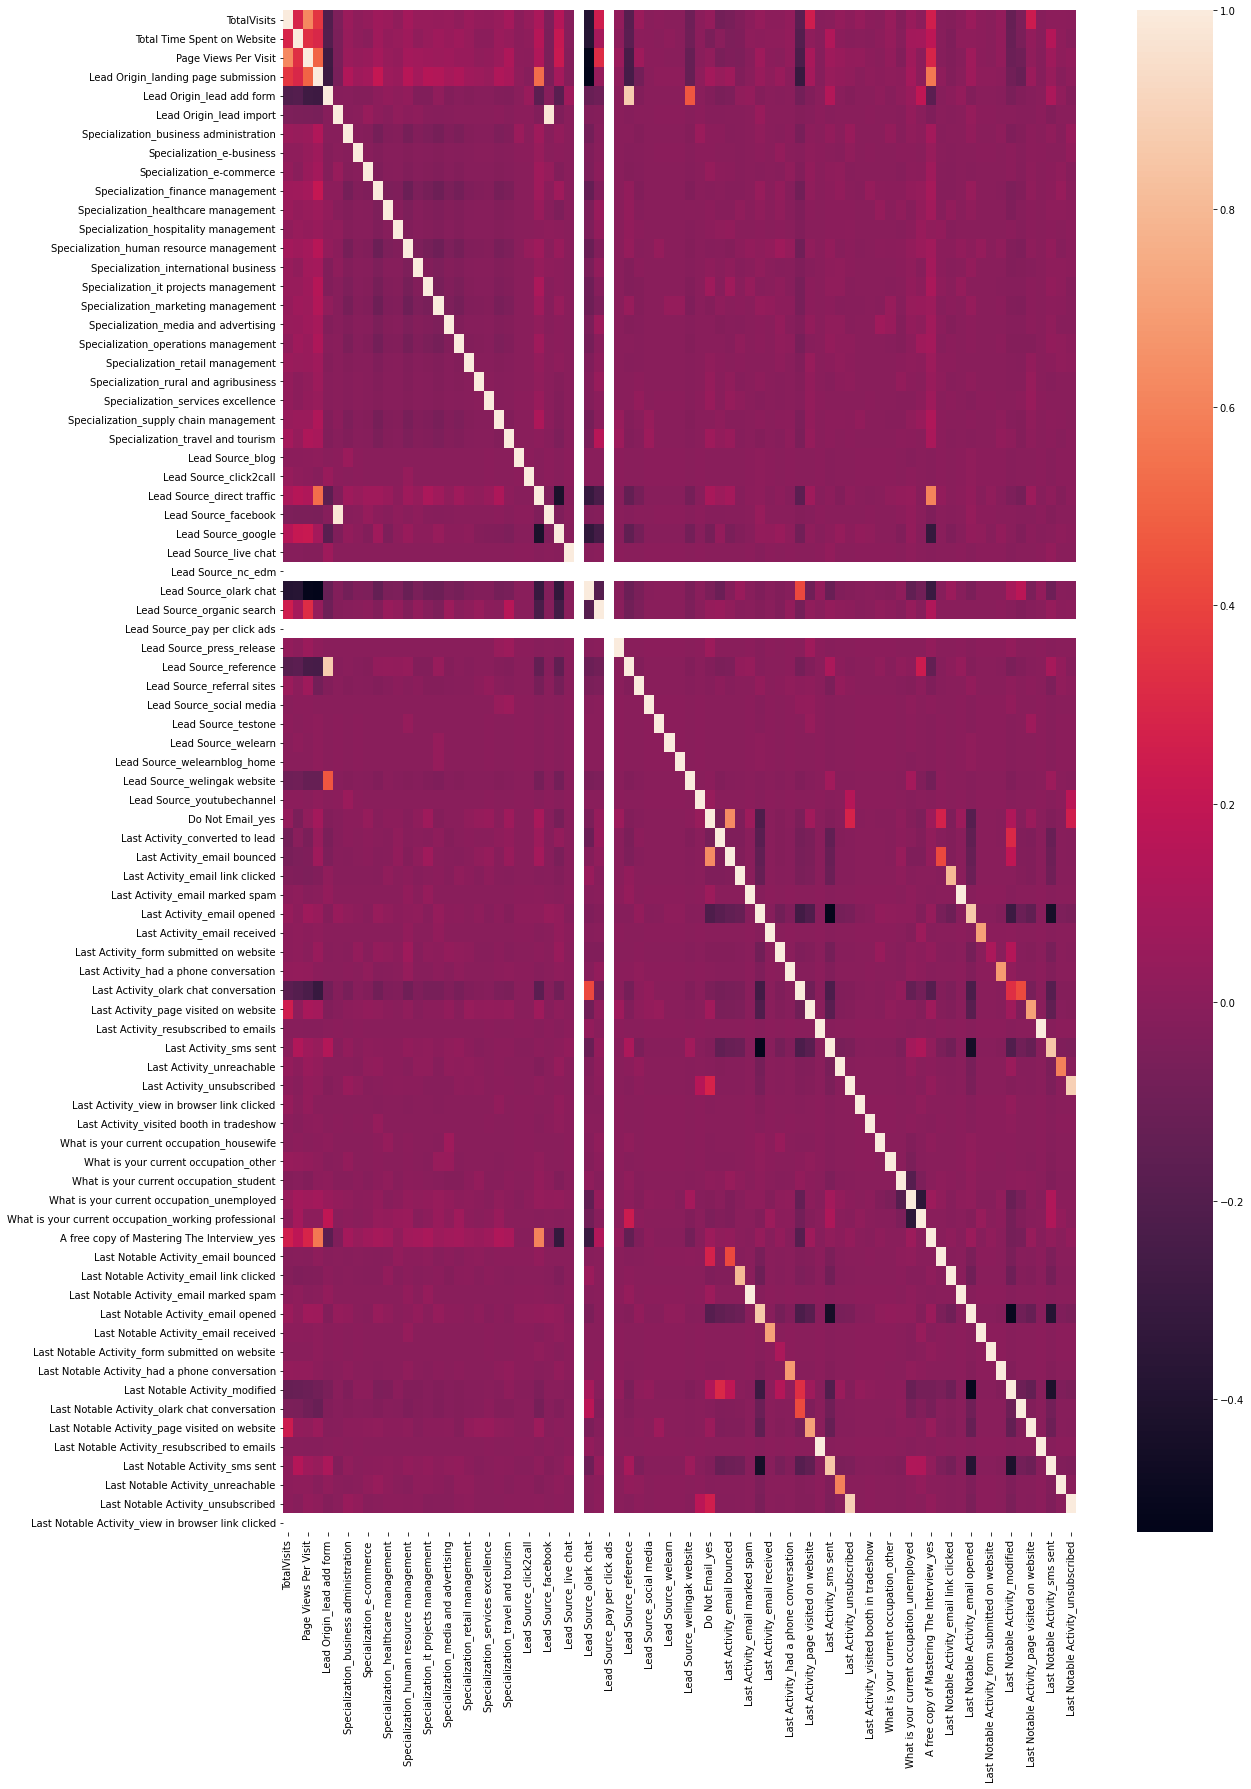

In [127]:
# to check the correlation among varibles
plt.figure(figsize=(18,28))
sns.heatmap(X_train.corr())
plt.show()

Since there are a lot of variables it is difficult to drop variable. We'll do it after RFE

## 5. Model Building

In [140]:
# importing 'LogisticRegression'
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

# import RFE
from sklearn.feature_selection import RFE

In [141]:
# running RFE with 15 variables as output
rfe = RFE(logreg, step = 15)
rfe = rfe.fit(X_train, y_train)

In [142]:
# features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Total Time Spent on Website', True, 1),
 ('Lead Origin_landing page submission', False, 3),
 ('Lead Origin_lead add form', True, 1),
 ('Specialization_e-commerce', False, 3),
 ('Specialization_finance management', False, 3),
 ('Specialization_healthcare management', False, 3),
 ('Specialization_it projects management', False, 3),
 ('Specialization_marketing management', False, 3),
 ('Specialization_operations management', False, 3),
 ('Specialization_rural and agribusiness', False, 3),
 ('Specialization_services excellence', False, 3),
 ('Specialization_supply chain management', False, 3),
 ('Lead Source_direct traffic', True, 1),
 ('Lead Source_google', True, 1),
 ('Lead Source_olark chat', False, 3),
 ('Lead Source_organic search', True, 1),
 ('Lead Source_reference', False, 2),
 ('Lead Source_referral sites', True, 1),
 ('Lead Source_welingak website', True, 1),
 ('Do Not Email_yes', True, 1),
 ('Last Activity_converted to lead', False, 2),
 ('Last Activity_email bounced', False,

In [143]:
# putting all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]

In [144]:
# selecting columns selected by RFE
X_train = X_train[col]

In [145]:
# importing statsmodels
import statsmodels.api as sm

In [146]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2592.9
Date:                Thu, 16 Mar 2023   Deviance:                       5185.7
Time:                        17:18:03   Pearson chi2:                 6.42e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4043
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6402      0.111     -5.775      0.000      -0.857      -0.423
Total Time Spent on Website                              1.1268      0.041     27.594      0.000       1.047       1.207
Lead Origin_lead add form                                2.2302      0.229      9.755      0.000       1.782       2.678
Lead Source_direct traffic                              -1.6088      0.117    -13.771      0.000      -1.838      -1.380
Lead Source_google                                      -1.2418      0.113    -11.031      0.000      -1.462      -1.021
Lead Source_organic search                              -1.3493      0.133    -10.122      0.000      -1.611      -1.088
Lead Source_referral sites                              -1.1378      0.326     -3.490      0.000      -1.777      -0.499
Lead Source_welingak website                             2.5150      1.032      2.438      0.015       0.493       4.537
Do Not Email_yes                                        -1.2887      0.174     -7.423      0.000      -1.629      -0.948
Last Activity_had a phone conversation                   1.0708      0.857      1.249      0.212      -0.609       2.751
Last Activity_olark chat conversation                   -1.0874      0.173     -6.284      0.000      -1.427      -0.748
Last Activity_sms sent                                   1.1826      0.076     15.633      0.000       1.034       1.331
What is your current occupation_housewife               25.2327   3.17e+04      0.001      0.999   -6.21e+04    6.21e+04
What is your current occupation_other                    2.3788      0.779      3.054      0.002       0.852       3.906
What is your current occupation_student                  1.2025      0.232      5.177      0.000       0.747       1.658
What is your current occupation_unemployed               1.1034      0.087     12.707      0.000       0.933       1.274
What is your current occupation_working professional     3.6518      0.207     17.666      0.000       3.247       4.057
Last Notable Activity_email link clicked                -0.5456      0.274     -1.988      0.047      -1.083      -0.008
Last Notable Activity_had a phone conversation          22.7306   2.19e+04      0.001      0.999   -4.29e+04     4.3e+04
Last Notable Activity_modified                          -0.7281      0.082     -8.897      0.000      -0.889      -0.568
Last Notable Activity_unreachable                        1.5662      0.609      2.570      0.010       0.372       2.761
========================================================================================================================
"""

In [147]:
# importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [149]:
# make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,What is your current occupation_unemployed,2.73
3,Lead Source_google,1.97
2,Lead Source_direct traffic,1.92
8,Last Activity_had a phone conversation,1.91
17,Last Notable Activity_had a phone conversation,1.90
18,Last Notable Activity_modified,1.76
1,Lead Origin_lead add form,1.72
10,Last Activity_sms sent,1.53
4,Lead Source_organic search,1.44
15,What is your current occupation_working profes...,1.33


In [150]:
# some P-value are not good. So dropping the column 'Last Notable Activity_had a phone conversation'
X_train.drop('Last Notable Activity_had a phone conversation', axis = 1, inplace = True)

In [151]:
# refitting the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2595.2
Date:                Thu, 16 Mar 2023   Deviance:                       5190.5
Time:                        17:57:08   Pearson chi2:                 6.43e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.4038
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6399      0.111     -5.773      0.000      -0.857      -0.423
Total Time Spent on Website                              1.1253      0.041     27.571      0.000       1.045       1.205
Lead Origin_lead add form                                2.2279      0.229      9.742      0.000       1.780       2.676
Lead Source_direct traffic                              -1.6077      0.117    -13.762      0.000      -1.837      -1.379
Lead Source_google                                      -1.2361      0.112    -10.989      0.000      -1.457      -1.016
Lead Source_organic search                              -1.3519      0.133    -10.142      0.000      -1.613      -1.091
Lead Source_referral sites                              -1.1436      0.327     -3.494      0.000      -1.785      -0.502
Lead Source_welingak website                             2.5178      1.032      2.440      0.015       0.496       4.540
Do Not Email_yes                                        -1.2904      0.174     -7.436      0.000      -1.631      -0.950
Last Activity_had a phone conversation                   2.0944      0.675      3.104      0.002       0.772       3.417
Last Activity_olark chat conversation                   -1.0833      0.173     -6.261      0.000      -1.422      -0.744
Last Activity_sms sent                                   1.1817      0.076     15.622      0.000       1.033       1.330
What is your current occupation_housewife               23.2351   1.17e+04      0.002      0.998   -2.28e+04    2.29e+04
What is your current occupation_other                    2.3822      0.779      3.057      0.002       0.855       3.910
What is your current occupation_student                  1.2032      0.232      5.180      0.000       0.748       1.658
What is your current occupation_unemployed               1.1045      0.087     12.718      0.000       0.934       1.275
What is your current occupation_working professional     3.6525      0.207     17.665      0.000       3.247       4.058
Last Notable Activity_email link clicked                -0.5477      0.274     -1.996      0.046      -1.085      -0.010
Last Notable Activity_modified                          -0.7371      0.082     -9.017      0.000      -0.897      -0.577
Last Notable Activity_unreachable                        1.5632      0.609      2.565      0.010       0.369       2.758
========================================================================================================================
"""

In [152]:
# again making a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,What is your current occupation_unemployed,2.73
3,Lead Source_google,1.96
2,Lead Source_direct traffic,1.92
17,Last Notable Activity_modified,1.75
1,Lead Origin_lead add form,1.72
10,Last Activity_sms sent,1.53
4,Lead Source_organic search,1.44
15,What is your current occupation_working profes...,1.33
9,Last Activity_olark chat conversation,1.32
6,Lead Source_welingak website,1.31


In [154]:
# again the P-value are not good. So dropping the column 'What is your current occupation housewife
X_train.drop('What is your current occupation_housewife', axis = 1, inplace = True)

In [155]:
# refitting the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2603.5
Date:                Thu, 16 Mar 2023   Deviance:                       5206.9
Time:                        17:58:56   Pearson chi2:                 6.44e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4023
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6220      0.110     -5.633      0.000      -0.838      -0.406
Total Time Spent on Website                              1.1237      0.041     27.585      0.000       1.044       1.204
Lead Origin_lead add form                                2.2566      0.229      9.859      0.000       1.808       2.705
Lead Source_direct traffic                              -1.5995      0.117    -13.718      0.000      -1.828      -1.371
Lead Source_google                                      -1.2292      0.112    -10.949      0.000      -1.449      -1.009
Lead Source_organic search                              -1.3345      0.133    -10.041      0.000      -1.595      -1.074
Lead Source_referral sites                              -1.1427      0.327     -3.496      0.000      -1.783      -0.502
Lead Source_welingak website                             2.4967      1.032      2.420      0.016       0.474       4.519
Do Not Email_yes                                        -1.2948      0.173     -7.466      0.000      -1.635      -0.955
Last Activity_had a phone conversation                   2.0846      0.675      3.089      0.002       0.762       3.407
Last Activity_olark chat conversation                   -1.0894      0.173     -6.301      0.000      -1.428      -0.751
Last Activity_sms sent                                   1.1733      0.076     15.537      0.000       1.025       1.321
What is your current occupation_other                    2.3564      0.779      3.025      0.002       0.830       3.883
What is your current occupation_student                  1.1797      0.232      5.081      0.000       0.725       1.635
What is your current occupation_unemployed               1.0821      0.086     12.537      0.000       0.913       1.251
What is your current occupation_working professional     3.6283      0.206     17.572      0.000       3.224       4.033
Last Notable Activity_email link clicked                -0.5567      0.274     -2.030      0.042      -1.094      -0.019
Last Notable Activity_modified                          -0.7366      0.082     -9.030      0.000      -0.896      -0.577
Last Notable Activity_unreachable                        1.5538      0.609      2.551      0.011       0.360       2.748
========================================================================================================================
"""

In [156]:
# VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,What is your current occupation_unemployed,2.72
3,Lead Source_google,1.96
2,Lead Source_direct traffic,1.92
16,Last Notable Activity_modified,1.75
1,Lead Origin_lead add form,1.71
10,Last Activity_sms sent,1.53
4,Lead Source_organic search,1.43
14,What is your current occupation_working profes...,1.33
9,Last Activity_olark chat conversation,1.32
6,Lead Source_welingak website,1.31


In [157]:
# the VIF values seem fine but the p-value is not. So dropping 'What is your current occupation other'
X_train.drop('What is your current occupation_other', axis = 1, inplace = True)

In [158]:
# refitting the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2608.6
Date:                Thu, 16 Mar 2023   Deviance:                       5217.1
Time:                        18:01:53   Pearson chi2:                 6.44e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4013
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6010      0.110     -5.466      0.000      -0.816      -0.385
Total Time Spent on Website                              1.1263      0.041     27.660      0.000       1.046       1.206
Lead Origin_lead add form                                2.2656      0.229      9.901      0.000       1.817       2.714
Lead Source_direct traffic                              -1.5885      0.116    -13.647      0.000      -1.817      -1.360
Lead Source_google                                      -1.2247      0.112    -10.924      0.000      -1.444      -1.005
Lead Source_organic search                              -1.3263      0.133     -9.990      0.000      -1.587      -1.066
Lead Source_referral sites                              -1.1447      0.327     -3.506      0.000      -1.785      -0.505
Lead Source_welingak website                             2.4976      1.032      2.421      0.015       0.475       4.520
Do Not Email_yes                                        -1.3000      0.173     -7.501      0.000      -1.640      -0.960
Last Activity_had a phone conversation                   2.0799      0.675      3.081      0.002       0.757       3.403
Last Activity_olark chat conversation                   -1.0861      0.173     -6.286      0.000      -1.425      -0.747
Last Activity_sms sent                                   1.1669      0.075     15.476      0.000       1.019       1.315
What is your current occupation_student                  1.1539      0.232      4.975      0.000       0.699       1.609
What is your current occupation_unemployed               1.0573      0.086     12.343      0.000       0.889       1.225
What is your current occupation_working professional     3.6028      0.206     17.474      0.000       3.199       4.007
Last Notable Activity_email link clicked                -0.5644      0.274     -2.059      0.039      -1.102      -0.027
Last Notable Activity_modified                          -0.7374      0.081     -9.053      0.000      -0.897      -0.578
Last Notable Activity_unreachable                        1.5460      0.609      2.539      0.011       0.353       2.739
========================================================================================================================
"""

In [159]:
# make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,What is your current occupation_unemployed,2.71
3,Lead Source_google,1.96
2,Lead Source_direct traffic,1.91
15,Last Notable Activity_modified,1.75
1,Lead Origin_lead add form,1.71
10,Last Activity_sms sent,1.53
4,Lead Source_organic search,1.43
13,What is your current occupation_working profes...,1.33
9,Last Activity_olark chat conversation,1.32
6,Lead Source_welingak website,1.31


Now, all the VIF values are good and all the p-values are below 0.05. So we can fix model.

## 6. Creating Prediction

In [160]:
# predicting probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1289    0.748613
3604    0.168524
5584    0.327476
7679    0.103353
7563    0.442360
7978    0.790169
7780    0.155937
7863    0.985577
838     0.705587
708     0.112634
dtype: float64

In [161]:
# reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.74861312, 0.16852397, 0.32747559, 0.10335276, 0.44236049,
       0.79016856, 0.15593745, 0.98557666, 0.70558652, 0.11263413])

In [162]:
# dataframe with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,1,0.748613
1,0,0.168524
2,0,0.327476
3,0,0.103353
4,0,0.442360


In [163]:
# substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,1,0.748613,1
1,0,0.168524,0
2,0,0.327476,0
3,0,0.103353,0
4,0,0.442360,0


## 7. Model Evaluation

In [164]:
# importing metrics from sklearn for evaluation
from sklearn import metrics

In [165]:
# creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3457,  438],
       [ 735, 1721]], dtype=int64)

In [166]:
# Predicted     not_churn    churn
# Actual
# not_churn        3457       438
# churn             735      1721

In [167]:
# checking overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8153046764289088

that's around 81% accuracy with is a very good value

In [168]:
# substituting the value of true positive
tp = confusion[1,1]
# substituting the value of true negatives
tn = confusion[0,0]
# substituting the value of false positives
fp = confusion[0,1] 
# substituting the value of false negatives
fn = confusion[1,0]

In [169]:
# calculating sensitivity
tp/(tp+fn)

0.7007328990228013

In [170]:
# calculating specificity
tn/(tn+fp)

0.8875481386392812

With the current cut off as 0.5 we have around 81% accuracy, sensitivity of around 70% and specificity of around 88%

## 7. ROC Curve

In [171]:
# defining ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [172]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

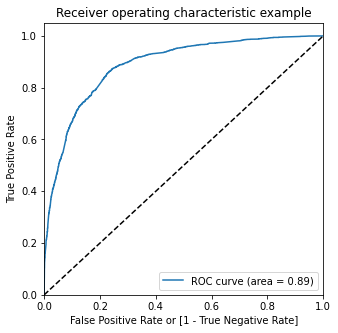

In [173]:
# calling the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [174]:
# creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.748613,1,1,1,1,1,1,1,1,1,0,0
1,0,0.168524,0,1,1,0,0,0,0,0,0,0,0
2,0,0.327476,0,1,1,1,1,0,0,0,0,0,0
3,0,0.103353,0,1,1,0,0,0,0,0,0,0,0
4,0,0.442360,0,1,1,1,1,1,0,0,0,0,0


In [175]:
# creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.386711,1.000000,0.000000
0.1,0.1,0.628405,0.968241,0.414121
0.2,0.2,0.758621,0.918974,0.657510
0.3,0.3,0.801449,0.868078,0.759435
0.4,0.4,0.809479,0.769137,0.834917
0.5,0.5,0.815305,0.700733,0.887548
0.6,0.6,0.805542,0.630700,0.915789
0.7,0.7,0.778618,0.515065,0.944801
0.8,0.8,0.754369,0.418567,0.966110
0.9,0.9,0.707605,0.264658,0.986906


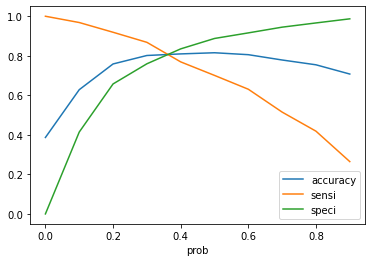

In [176]:
# plotting
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [177]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.748613,1,1,1,1,1,1,1,1,1,0,0,1
1,0,0.168524,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.327476,0,1,1,1,1,0,0,0,0,0,0,0
3,0,0.103353,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.442360,0,1,1,1,1,1,0,0,0,0,0,1


In [178]:
# checking overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8056998897811368

In [179]:
# creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3056,  839],
       [ 395, 2061]], dtype=int64)

In [180]:
# substituting the value of true positive
tp = confusion2[1,1]
# substituting the value of true negatives
tn = confusion2[0,0]
# substituting the value of false positives
fp = confusion2[0,1] 
# substituting the value of false negatives
fn = confusion2[1,0]

In [181]:
# calculating sensitivity
tp/(tp+fn)

0.8391693811074918

In [182]:
# calculating specificity
tn/(tn+fp)

0.7845956354300385

With the current cut off as 0.35 we have accuracy, sensitivity of around 83% and specificity of around 78%

## 8. Prediction on Test set

In [184]:
# scaling numeric values
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [185]:
# substituting all columns in final train model
col = X_train.columns

In [186]:
# selecting columns in X_train for X_test as well
X_test = X_test[col]
# adding a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm
X_test_sm

,const,Total Time Spent on Website,Lead Origin_lead add form,Lead Source_direct traffic,Lead Source_google,Lead Source_organic search,Lead Source_referral sites,Lead Source_welingak website,Do Not Email_yes,Last Activity_had a phone conversation,Last Activity_olark chat conversation,Last Activity_sms sent,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional,Last Notable Activity_email link clicked,Last Notable Activity_modified,Last Notable Activity_unreachable
8308,1.0,0.840787,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
7212,1.0,-0.878083,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
2085,1.0,-0.883545,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4048,1.0,1.669267,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
4790,1.0,-0.861695,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3261,1.0,-0.883545,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
8179,1.0,-0.268102,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
6236,1.0,-0.883545,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5240,1.0,1.013766,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0


In [187]:
# storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.284430
1,1,0.864536
2,1,0.985577
3,1,0.871567
4,0,0.108837


In [188]:
# making prediction using cut off 0.35
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.284430,0
1,1,0.864536,1
2,1,0.985577,1
3,1,0.871567,1
4,0,0.108837,0
...,...,...,...
2718,1,0.086087,0
2719,0,0.154709,0
2720,0,0.168524,0
2721,1,0.823519,1


In [189]:
# checking overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8079324274697025

In [190]:
# creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1370,  374],
       [ 149,  830]], dtype=int64)

In [191]:
# substituting the value of true positive
tp = confusion2[1,1]
# substituting the value of true negatives
tn = confusion2[0,0]
# substituting the value of false positives
fp = confusion2[0,1] 
# substituting the value of false negatives
fn = confusion2[1,0]

In [192]:
# calculating sensitivity
tp/(tp+fn)

0.8478038815117467

In [193]:
# calculating specificity
tn/(tn+fp)

0.7855504587155964

With the current cut off as 0.35 we have accuracy, sensitivity of around 84% and specificity of around 78%

## 9. Precision-Recall

In [194]:
conf = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
conf

array([[3457,  438],
       [ 735, 1721]], dtype=int64)

In [195]:
conf[1,1]/(conf[0,1]+conf[1,1])


0.7971283001389532

In [196]:
conf[1,1]/(conf[1,0]+conf[1,1])

0.7007328990228013

With the current cut off as 0.35 we have Precision around 80% and Recall around 70%

### Precision and recall tradeoff

In [197]:
from sklearn.metrics import precision_recall_curve

In [198]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    1
 Name: Converted, Length: 6351, dtype: int64,
 0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    0
 Name: Predicted, Length: 6351, dtype: int64)

In [199]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

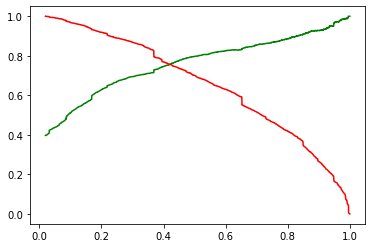

In [200]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [201]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.748613,1,1,1,1,1,1,1,1,1,0,0,1
1,0,0.168524,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.327476,0,1,1,1,1,0,0,0,0,0,0,0
3,0,0.103353,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.442360,0,1,1,1,1,1,0,0,0,0,0,1


In [202]:
# accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8112108329396945

In [203]:
# again creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3277,  618],
       [ 581, 1875]], dtype=int64)

In [204]:
# substituting the value of true positive
tp = confusion2[1,1]
# substituting the value of true negatives
tn = confusion2[0,0]
# substituting the value of false positives
fp = confusion2[0,1] 
# substituting the value of false negatives
fn = confusion2[1,0]

In [205]:
# Precision = TP / TP + FP
tp / (tp + fp)

0.7521058965102286

In [206]:
#Recall = TP / TP + FN
tp / (tp + fn)

0.7634364820846905

With the current cut off as 0.41 we have Precision around 75% and Recall around 76%

## 10. Prediction on Test set

In [207]:
# storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.284430
1,1,0.864536
2,1,0.985577
3,1,0.871567
4,0,0.108837


In [208]:
# making prediction using cut off 0.41
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.284430,0
1,1,0.864536,1
2,1,0.985577,1
3,1,0.871567,1
4,0,0.108837,0
...,...,...,...
2718,1,0.086087,0
2719,0,0.154709,0
2720,0,0.168524,0
2721,1,0.823519,1


In [209]:
# check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8171134777818583

In [210]:
# creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1476,  268],
       [ 230,  749]], dtype=int64)

In [211]:
# Substituting the value of true positive
tp = confusion2[1,1]
# Substituting the value of true negatives
tn = confusion2[0,0]
# Substituting the value of false positives
fp = confusion2[0,1] 
# Substituting the value of false negatives
fn = confusion2[1,0]

In [212]:
# Precision = TP / TP + FP
tp / (tp + fp)

0.7364798426745329

In [213]:
#Recall = TP / TP + FN
tp / (tp + fn)

0.7650663942798774

With the current cut off as 0.41 we have Precision around 74% and Recall around 76%

## Conclusion